In [20]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [21]:
# numpy의 구조로 변환
perch_length=np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
)


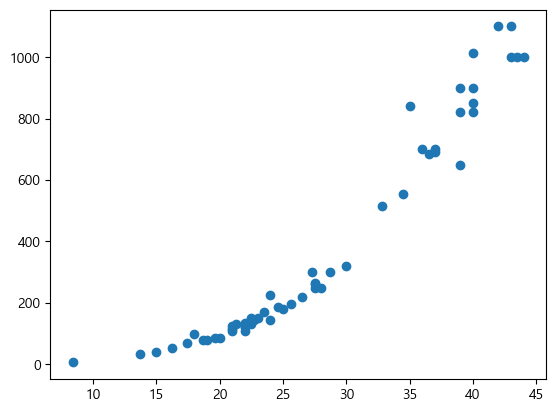

In [22]:
# 그래프
plt.scatter(perch_length,perch_weight)

0을 갖는 데이터, 그래프 모양 확인하기

In [23]:
# 1. 데이터 전처리: train,test세트
# random_state=42 : 랜덤으로 섞는것을 고정시킴, 예측률 고정
# 실제로는 고정하지 않는다.
train_input,test_input,train_target,test_target = train_test_split(
    perch_length,perch_weight,random_state=42
)

In [24]:
# train_input: 2가지 이상의 행렬로 구성, 2차원 행렬구성

In [25]:
# 1차원 train_input,test_input => 2차원 행렬로 변경
# 2개 이상의 특성값을 가지면 2차원 행렬이 되어 reshape할 필요 없다
train_input = train_input.reshape(-1,1)
train_input.shape
test_input = test_input.reshape(-1,1)

In [26]:
# 2. 데이터 훈련 시키기
knr = KNeighborsRegressor() # knn회귀: 예측 알고리즘 사용
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [27]:
# 3. 데이터 예측
predict = knr.predict(train_input)
print('예측값: ',predict)

예측값:  [  88.6  123.    79.6   70.6  723.   193.   847.   847.  1010.   123.
   95.   123.   174.   248.  1010.   847.   174.   113.   248.   847.
  659.   224.   723.    60.   140.    60.   719.   694.2  248.   167.
  847.   113.   168.   123.  1010.   136.    79.6  719.   123.   193.
  990.   659. ]


In [28]:
# 4. 예측률 구하기
score = knr.score(test_input,test_target)
print('test예측: ',score) # 0.992809406101064
# test가 train보다 높으면 과소적합 되었다 판단함.

test예측:  0.992809406101064


In [29]:
score = knr.score(train_input,train_target)
print('train예측: ',score) # 0.9698823289099254

train예측:  0.9698823289099254


In [30]:
# # test가 train보다 높으면 과소적합 되었다 판단함.
# n_neighbors개수를 줄임.

In [31]:
knr.n_neighbors=3 # 5개에서 3개로 줄임
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [32]:
# 예측률 구하기
score = knr.score(test_input,test_target)
print('test예측: ',score) # 0.992809406101064 => 0.9746459963987609
# test가 train보다 높으면 과소적합 되었다 판단함.
score = knr.score(train_input,train_target)
print('train예측: ',score) # 0.9698823289099254 => 0.9804899950518966

test예측:  0.9746459963987609
train예측:  0.9804899950518966


In [33]:
predict = knr.predict([[16.8]])
print(predict)

[62.66666667]


In [34]:
# 5부터 5의 배수로 45까지
# 5,10,15,20,25,30,35,40,45 길이를 예측해서 
# 선 그래프로 출력
# train_input, train_target 데이터를 scatter로 출력.
# ex_length = np.arange(5,45+1,5) 같은결과
x = np.array([5,10,15,20,25,30,35,40,45]).reshape(-1,1)
x


array([[ 5],
       [10],
       [15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45]])

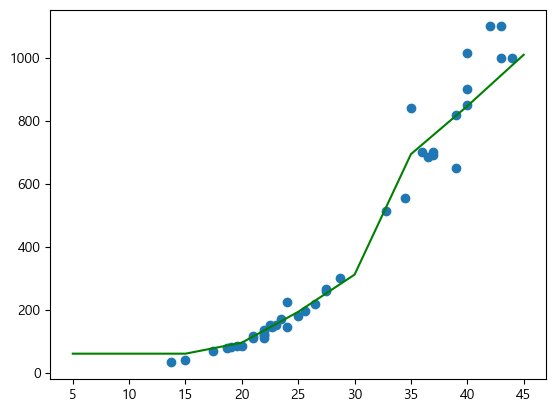

In [35]:
knr.n_neighbors = 3
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)
predict = knr.predict(x)
predict
plt.plot(x,predict,color='g')
plt.scatter(train_input,train_target)